In [50]:
import pandas as pd
import sqlite3

# Compte rendu

In [74]:
data_list = [
    ['log_produitrecu', 0.9852, 0.6395, 0.7594, 0.9855, 0.644, 0.7628 ],
    ['log_produitrecu_tps_retard_liv', 0.9834, 0.6401, 0.7594, 0.9835, 0.6442, 0.7625 ],
    ['log_produitrecu_tps_retard_liv_plafond', 0.9327, 0.6478, 0.7536, 0.9354, 0.6548, 0.7589 ],
    ['cart_produitrecu_tps_retard_liv', 0.983, 0.6427, 0.7607, 0.9828, 0.646, 0.7633 ],
    ['log_order_status', 0.9958, 0.6011, 0.7425, 0.995, 0.604, 0.7448 ],
    ['log_produitrecu_order_status', 0.9852, 0.6395, 0.7594, 0.9855, 0.644, 0.7628 ],
    ['log_produitrecu_price_freight', 0.9802, 0.6399, 0.7587, 0.9801, 0.6432, 0.7614 ],
    ['log_produitrecu_freight', 0.9827, 0.6399, 0.7592, 0.9827, 0.6439, 0.7622 ],
    ['log_produitrecu_price', 0.9852, 0.6395, 0.7594, 0.9855, 0.644, 0.7628 ],
    ['log_produitrecu_product_cat', 0.9854, 0.6225, 0.746, 0.9854, 0.6227, 0.7462 ],
    ['log_produitrecu_photo_qty', 0.9854, 0.6225, 0.746, 0.9854, 0.6227, 0.7462 ],
    ['log_produitrecu_description_lenght', 0.9854, 0.6225, 0.746, 0.9854, 0.6227, 0.7462 ],
    ['log_only_photo_qty', 1.0, 0.5776, 0.7322, 1.0, 0.5809, 0.7349 ],
]

# Define column names
columns = ['Name', 'Train_recall', 'Train_acc','Train_f1','Test_recall','Test_acc','Test_f1']

# Create an empty DataFrame with columns
results = pd.DataFrame(columns=columns)

# Iterate through the list and append rows to the DataFrame
for i, row_data in enumerate(data_list):
    results.loc[i] = row_data


# Display the resulting DataFrame
print(results)

                                     Name  Train_recall  Train_acc  Train_f1  \
0                         log_produitrecu        0.9852     0.6395    0.7594   
1          log_produitrecu_tps_retard_liv        0.9834     0.6401    0.7594   
2  log_produitrecu_tps_retard_liv_plafond        0.9327     0.6478    0.7536   
3         cart_produitrecu_tps_retard_liv        0.9830     0.6427    0.7607   
4                        log_order_status        0.9958     0.6011    0.7425   
5            log_produitrecu_order_status        0.9852     0.6395    0.7594   
6           log_produitrecu_price_freight        0.9802     0.6399    0.7587   
7                 log_produitrecu_freight        0.9827     0.6399    0.7592   
8                   log_produitrecu_price        0.9852     0.6395    0.7594   

   Test_recall  Test_acc  Test_f1  
0       0.9855    0.6440   0.7628  
1       0.9835    0.6442   0.7625  
2       0.9354    0.6548   0.7589  
3       0.9828    0.6460   0.7633  
4       0.9950    0

# Mise en place

In [51]:
connection = sqlite3.connect("olist.db")

df = pd.read_sql_query("SELECT * FROM TrainingDataset",connection)

connection.close()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98344 entries, 0 to 98343
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   review_id                      98344 non-null  object 
 1   order_id                       98344 non-null  object 
 2   review_score                   98344 non-null  int64  
 3   review_comment_title           98344 non-null  object 
 4   review_comment_message         98344 non-null  object 
 5   review_creation_date           98344 non-null  object 
 6   review_answer_timestamp        98344 non-null  object 
 7   customer_id                    98344 non-null  object 
 8   order_status                   98344 non-null  object 
 9   order_purchase_timestamp       98344 non-null  object 
 10  order_approved_at              98344 non-null  object 
 11  order_delivered_carrier_date   98344 non-null  object 
 12  order_delivered_customer_date  95542 non-null 

In [36]:
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price,freight_value,score,temps_livraison,retard_livraison,produit_recu
0,fe3db7c069d694bab50cc43463f91608,2ca73e2ff9e3a186ad1e1ffb9b1d9c10,5,,A compra foi realizada facilmente.\r\nA entreg...,2018-03-23 00:00:00,2018-04-01 00:27:51,e76f777f29e83b393d786accf49e7955,delivered,2018-03-18 21:01:32,2018-03-18 21:15:36,2018-03-19 19:52:47,2018-03-23 00:32:34,2018-04-11 00:00:00,139.9,39.97,1,4.0,-19.0,1
1,e07eee7ad7666276bd8b27fbd83fd1ff,68b3cbc68e4cd1fe19bec35f1d3bb7ee,5,,relógio muito bonito e barato.,2018-03-29 00:00:00,2018-04-02 14:19:31,1a814d4c8923ef3a0e978777f00b717c,delivered,2018-03-10 00:42:20,2018-03-10 01:21:04,2018-03-12 21:05:34,2018-03-28 18:13:06,2018-03-29 00:00:00,65.0,15.33,1,18.0,-1.0,1
2,2c5e27fc178bde7ac173c9c62c31b070,0ce9a24111d850192a933fcaab6fbad3,1,,Não gostei ! Comprei gato por lebre,2017-12-13 00:00:00,2017-12-16 07:14:07,5bb8de60ca2ca8b01a5ce471802fe10b,delivered,2017-11-24 01:40:48,2017-11-24 01:49:34,2017-12-06 15:19:09,2017-12-13 00:28:44,2017-12-19 00:00:00,159.9,28.50,0,18.0,-6.0,1
3,540e7bbb2d06cfb7f85f3a88ba7ac97f,cf73e2cb1f4a9480ed70c154da3d954a,5,,,2018-01-18 00:00:00,2018-01-18 19:12:30,ef1ed1347404166e73e8f3977ffcbca0,delivered,2018-01-11 11:23:09,2018-01-12 02:38:33,2018-01-13 01:07:00,2018-01-17 14:36:38,2018-02-01 00:00:00,50.0,11.85,1,6.0,-15.0,1
4,6a18a4001ae7fd911b3b9fb13686d105,8ba3f3a9292fbc22a8b7dff752bbcd37,5,,,2017-07-19 00:00:00,2017-07-20 10:38:48,0315a87fba4dab4865f2071777b98e87,delivered,2017-07-07 10:07:16,2017-07-07 10:23:34,2017-07-08 11:46:44,2017-07-18 23:16:44,2017-07-31 00:00:00,59.9,16.18,1,11.0,-13.0,1


# Model naif

In [45]:
from sklearn.model_selection import train_test_split
y = df['score']
X = df[["produit_recu"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [46]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [47]:
model.fit(X_train,y_train)

LogisticRegression()

In [48]:
from sklearn.metrics import recall_score, accuracy_score, f1_score

recall_train = round(recall_score(y_train, model.predict(X_train)),4)
acc_train = round(accuracy_score(y_train, model.predict(X_train)),4)
f1_train = round(f1_score(y_train, model.predict(X_train)),4)

print(f"Pour le jeu d'entrainement: \n le recall est de {recall_train}, \n l'accuracy de {acc_train} \n le f1 score de {f1_train}")

recall_test = round(recall_score(y_test, model.predict(X_test)),4)
acc_test = round(accuracy_score(y_test, model.predict(X_test)),4)
f1_test = round(f1_score(y_test, model.predict(X_test)),4)

print(f"Pour le jeu de test: \n le recall est de {recall_test}, \n l'accuracy de {acc_test} \n le f1 score de {f1_test}")

model_name = 'log_produitrecu'
print(f"['{model_name}', {recall_train}, {acc_train}, {f1_train}, {recall_test}, {acc_test}, {f1_test} ],")

Pour le jeu d'entrainement: 
 le recall est de 0.9852, 
 l'accuracy de 0.6395 
 le f1 score de 0.7594
Pour le jeu de test: 
 le recall est de 0.9855, 
 l'accuracy de 0.644 
 le f1 score de 0.7628
['log_produitrecu', 0.9852, 0.6395, 0.7594, 0.9855, 0.644, 0.7628 ],


# Model avec les délais de livraison

In [18]:
from sklearn.model_selection import train_test_split
y = df['score']
X = df[["produit_recu","temps_livraison","retard_livraison"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [19]:
from sklearn.impute import SimpleImputer

# Je choisis la stratgéie de remplacer par le maximu
imputer_temps_livraison = SimpleImputer(strategy="constant",fill_value=X_train.temps_livraison.max())

# j'ajuste mon transformeur pour qu'il prenne la valeur du max sur le jeu de train
imputer_temps_livraison.fit(X_train[["temps_livraison"]])

# je remplace les valeurs manquantes du jeu de train par le max calculé (sur le jeu de train)
X_train[["temps_livraison"]] = imputer_temps_livraison.transform(X_train[["temps_livraison"]])

# je remplace les valeurs manquantes du jeu de test par le max calculé (sur le jeu de train)
X_test[["temps_livraison"]] = imputer_temps_livraison.transform(X_test[["temps_livraison"]])

In [20]:
# Je choisis la stratgéie de remplacer par le maximum
imputer_retard_livraison = SimpleImputer(strategy="constant",fill_value=X_train.retard_livraison.max())

# j'ajuste mon transformeur pour qu'il prenne la valeur du max sur le jeu de train
imputer_retard_livraison.fit(X_train[["retard_livraison"]])

# je remplace les valeurs manquantes du jeu de train par le max calculé (sur le jeu de train)
X_train[["retard_livraison"]] = imputer_retard_livraison.transform(X_train[["retard_livraison"]])

# je remplace les valeurs manquantes du jeu de test par le max calculé (sur le jeu de train)
X_test[["retard_livraison"]] = imputer_retard_livraison.transform(X_test[["retard_livraison"]])

In [21]:
X_train["retard_livraison"].isna().value_counts()

retard_livraison
False    89686
Name: count, dtype: int64

In [22]:
X_test["retard_livraison"].isna().value_counts()

retard_livraison
False    22422
Name: count, dtype: int64

In [23]:
X_train.head()

,produit_recu,temps_livraison,retard_livraison
83146,1,13.0,-20.0
12902,1,12.0,-24.0
102164,1,7.0,-16.0
27311,1,2.0,-11.0
12331,1,13.0,-20.0


In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [25]:
model.fit(X_train,y_train)

LogisticRegression()

In [26]:
from sklearn.metrics import recall_score, accuracy_score, f1_score

recall_train = round(recall_score(y_train, model.predict(X_train)),4)
acc_train = round(accuracy_score(y_train, model.predict(X_train)),4)
f1_train = round(f1_score(y_train, model.predict(X_train)),4)

print(f"Pour le jeu d'entrainement: \n le recall est de {recall_train}, \n l'accuracy de {acc_train} \n le f1 score de {f1_train}")

recall_test = round(recall_score(y_test, model.predict(X_test)),4)
acc_test = round(accuracy_score(y_test, model.predict(X_test)),4)
f1_test = round(f1_score(y_test, model.predict(X_test)),4)

print(f"Pour le jeu de test: \n le recall est de {recall_test}, \n l'accuracy de {acc_test} \n le f1 score de {f1_test}")

model_name = 'log_produitrecu_tps_retard_liv'
print(f"['{model_name}', {recall_train}, {acc_train}, {f1_train}, {recall_test}, {acc_test}, {f1_test} ],")

Pour le jeu d'entrainement: 
 le recall est de 0.9807, 
 l'accuracy de 0.6236 
 le f1 score de 0.7456
Pour le jeu de test: 
 le recall est de 0.9792, 
 l'accuracy de 0.6231 
 le f1 score de 0.7452
['log_produitrecu_tps_retard_liv', 0.9807, 0.6236, 0.7456, 0.9792, 0.6231, 0.7452 ],


# Plafonnement de temps et retard de livraison

In [27]:
from sklearn.model_selection import train_test_split
y = df['score']
X = df[["produit_recu","temps_livraison","retard_livraison"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [28]:
X_train["temps_livraison"] = X_train["temps_livraison"].apply(lambda x: 50 if x>50 else x)
X_test["temps_livraison"] = X_test["temps_livraison"].apply(lambda x: 50 if x>50 else x)

X_train["retard_livraison"] = X_train["retard_livraison"].apply(lambda x: 5 if x>5 else x)
X_test["retard_livraison"] = X_test["retard_livraison"].apply(lambda x: 5 if x>5 else x)
X_train["retard_livraison"] = X_train["retard_livraison"].apply(lambda x: -35 if x<-35 else x)
X_test["retard_livraison"] = X_test["retard_livraison"].apply(lambda x: -35 if x<-35 else x)

In [29]:
from sklearn.impute import SimpleImputer

# Je choisis la stratgéie de remplacer par le maximu
imputer_temps_livraison = SimpleImputer(strategy="constant",fill_value=X_train.temps_livraison.max())

# j'ajuste mon transformeur pour qu'il prenne la valeur du max sur le jeu de train
imputer_temps_livraison.fit(X_train[["temps_livraison"]])

# je remplace les valeurs manquantes du jeu de train par le max calculé (sur le jeu de train)
X_train[["temps_livraison"]] = imputer_temps_livraison.transform(X_train[["temps_livraison"]])

# je remplace les valeurs manquantes du jeu de test par le max calculé (sur le jeu de train)
X_test[["temps_livraison"]] = imputer_temps_livraison.transform(X_test[["temps_livraison"]])

In [30]:
# Je choisis la stratgéie de remplacer par le maximum
imputer_retard_livraison = SimpleImputer(strategy="constant",fill_value=X_train.retard_livraison.max())

# j'ajuste mon transformeur pour qu'il prenne la valeur du max sur le jeu de train
imputer_retard_livraison.fit(X_train[["retard_livraison"]])

# je remplace les valeurs manquantes du jeu de train par le max calculé (sur le jeu de train)
X_train[["retard_livraison"]] = imputer_retard_livraison.transform(X_train[["retard_livraison"]])

# je remplace les valeurs manquantes du jeu de test par le max calculé (sur le jeu de train)
X_test[["retard_livraison"]] = imputer_retard_livraison.transform(X_test[["retard_livraison"]])

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [32]:
model.fit(X_train,y_train)

LogisticRegression()

In [33]:
from sklearn.metrics import recall_score, accuracy_score, f1_score

recall_train = round(recall_score(y_train, model.predict(X_train)),4)
acc_train = round(accuracy_score(y_train, model.predict(X_train)),4)
f1_train = round(f1_score(y_train, model.predict(X_train)),4)

print(f"Pour le jeu d'entrainement: \n le recall est de {recall_train}, \n l'accuracy de {acc_train} \n le f1 score de {f1_train}")

recall_test = round(recall_score(y_test, model.predict(X_test)),4)
acc_test = round(accuracy_score(y_test, model.predict(X_test)),4)
f1_test = round(f1_score(y_test, model.predict(X_test)),4)

print(f"Pour le jeu de test: \n le recall est de {recall_test}, \n l'accuracy de {acc_test} \n le f1 score de {f1_test}")

model_name = 'log_produitrecu_tps_retard_liv_plafond'
print(f"['{model_name}', {recall_train}, {acc_train}, {f1_train}, {recall_test}, {acc_test}, {f1_test} ],")

Pour le jeu d'entrainement: 
 le recall est de 0.917, 
 l'accuracy de 0.6338 
 le f1 score de 0.738
Pour le jeu de test: 
 le recall est de 0.91, 
 l'accuracy de 0.6276 
 le f1 score de 0.7334
['log_produitrecu_tps_retard_liv_plafond', 0.917, 0.6338, 0.738, 0.91, 0.6276, 0.7334 ],


Consignes:
- 1  Creer des variables explicatives alternatives (temps_livraison, retard_livraison) en gérant les valeurs extremes par la technique de plafond.
    - Essayer de voir si avec ces variables le modèles s'améliore
- 2 Essayer de la lancer un DecisionTreeClassifier (avec les 3 variables précédantes) recherchez la meilleur valeur pour max_depth comme hyperparamètre

# Arbre de décision

In [55]:
from sklearn.model_selection import train_test_split
y = df['score']
X = df[["produit_recu","temps_livraison","retard_livraison"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [56]:
from sklearn.impute import SimpleImputer

# Je choisis la stratgéie de remplacer par le maximu
imputer_temps_livraison = SimpleImputer(strategy="constant",fill_value=X_train.temps_livraison.max())

# j'ajuste mon transformeur pour qu'il prenne la valeur du max sur le jeu de train
imputer_temps_livraison.fit(X_train[["temps_livraison"]])

# je remplace les valeurs manquantes du jeu de train par le max calculé (sur le jeu de train)
X_train[["temps_livraison"]] = imputer_temps_livraison.transform(X_train[["temps_livraison"]])

# je remplace les valeurs manquantes du jeu de test par le max calculé (sur le jeu de train)
X_test[["temps_livraison"]] = imputer_temps_livraison.transform(X_test[["temps_livraison"]])

In [57]:
# Je choisis la stratgéie de remplacer par le maximum
imputer_retard_livraison = SimpleImputer(strategy="constant",fill_value=X_train.retard_livraison.max())

# j'ajuste mon transformeur pour qu'il prenne la valeur du max sur le jeu de train
imputer_retard_livraison.fit(X_train[["retard_livraison"]])

# je remplace les valeurs manquantes du jeu de train par le max calculé (sur le jeu de train)
X_train[["retard_livraison"]] = imputer_retard_livraison.transform(X_train[["retard_livraison"]])

# je remplace les valeurs manquantes du jeu de test par le max calculé (sur le jeu de train)
X_test[["retard_livraison"]] = imputer_retard_livraison.transform(X_test[["retard_livraison"]])

In [58]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=2)

In [59]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [60]:
from sklearn.metrics import recall_score, accuracy_score, f1_score

recall_train = round(recall_score(y_train, model.predict(X_train)),4)
acc_train = round(accuracy_score(y_train, model.predict(X_train)),4)
f1_train = round(f1_score(y_train, model.predict(X_train)),4)

print(f"Pour le jeu d'entrainement: \n le recall est de {recall_train}, \n l'accuracy de {acc_train} \n le f1 score de {f1_train}")

recall_test = round(recall_score(y_test, model.predict(X_test)),4)
acc_test = round(accuracy_score(y_test, model.predict(X_test)),4)
f1_test = round(f1_score(y_test, model.predict(X_test)),4)

print(f"Pour le jeu de test: \n le recall est de {recall_test}, \n l'accuracy de {acc_test} \n le f1 score de {f1_test}")

model_name = 'cart_produitrecu_tps_retard_liv'
print(f"['{model_name}', {recall_train}, {acc_train}, {f1_train}, {recall_test}, {acc_test}, {f1_test} ],")

Pour le jeu d'entrainement: 
 le recall est de 0.983, 
 l'accuracy de 0.6427 
 le f1 score de 0.7607
Pour le jeu de test: 
 le recall est de 0.9828, 
 l'accuracy de 0.646 
 le f1 score de 0.7633
['cart_produitrecu_tps_retard_liv', 0.983, 0.6427, 0.7607, 0.9828, 0.646, 0.7633 ],


Consignes:
.1  Creer des variables explicatives alternatives (temps_livraison, retard_livraison) en gérant les valeurs extremes par la technique de plafond.
    - Essayer de voir si avec ces variables le modèles s'améliore
.2 Essayer de la lancer un DecisionTreeClassifier (avec les 3 variables précédantes) recherchez la meilleur valeur pour max_depth comme hyperparamètre

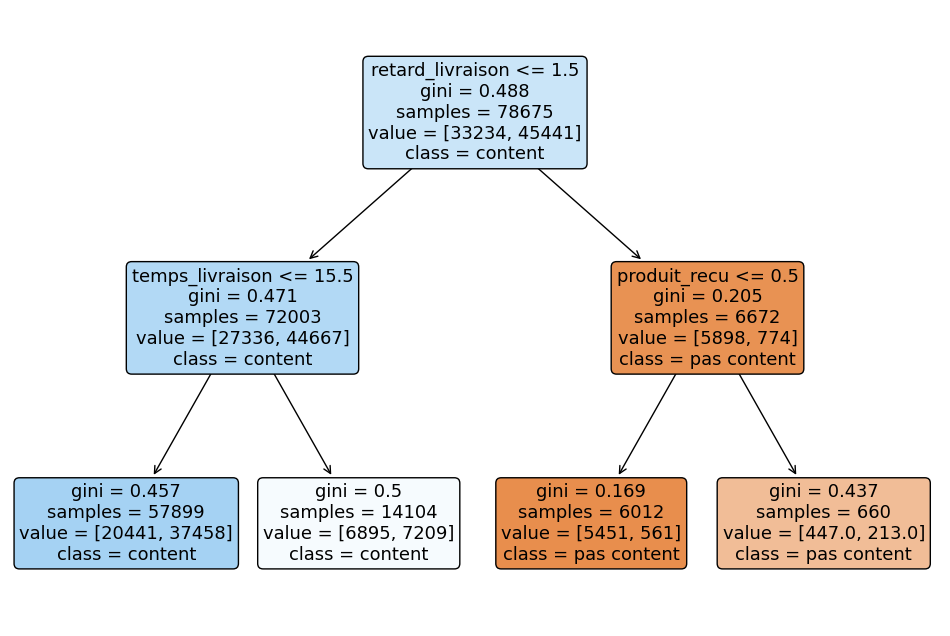

In [177]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, 
          feature_names=X_train.columns, 
          class_names=["pas content","content"], 
          rounded=True)
plt.show()

# Evaluation de Order_status

In [43]:
df.order_status.value_counts()

order_status
delivered      95544
shipped         1027
unavailable      595
canceled         576
invoiced         308
processing       294
Name: count, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score, f1_score
from sklearn.preprocessing import OneHotEncoder

y = df['score']
X = df[["order_status"]]

print("Modele avec order_status")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


encoder_order_status = OneHotEncoder()

X_train = encoder_order_status.fit_transform(X_train)
X_test = encoder_order_status.transform(X_test)


model = LogisticRegression()
model.fit(X_train,y_train)


recall_train = round(recall_score(y_train, model.predict(X_train)),4)
acc_train = round(accuracy_score(y_train, model.predict(X_train)),4)
f1_train = round(f1_score(y_train, model.predict(X_train)),4)

print(f"Pour le jeu d'entrainement: \n le recall est de {recall_train}, \n l'accuracy de {acc_train} \n le f1 score de {f1_train}")

recall_test = round(recall_score(y_test, model.predict(X_test)),4)
acc_test = round(accuracy_score(y_test, model.predict(X_test)),4)
f1_test = round(f1_score(y_test, model.predict(X_test)),4)

print(f"Pour le jeu de test: \n le recall est de {recall_test}, \n l'accuracy de {acc_test} \n le f1 score de {f1_test}")

model_name = 'log_order_status'
print(f"['{model_name}', {recall_train}, {acc_train}, {f1_train}, {recall_test}, {acc_test}, {f1_test} ],")


Modele avec order_status
Pour le jeu d'entrainement: 
 le recall est de 0.9958, 
 l'accuracy de 0.6011 
 le f1 score de 0.7425
Pour le jeu de test: 
 le recall est de 0.995, 
 l'accuracy de 0.604 
 le f1 score de 0.7448
['log_order_status', 0.9958, 0.6011, 0.7425, 0.995, 0.604, 0.7448 ],


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score, f1_score
from sklearn.preprocessing import OneHotEncoder

y = df['score']
X = df[["order_status","produit_recu"]]

print("Modele avec produit_recu et order_status")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


encoder_order_status = OneHotEncoder()

X_train = encoder_order_status.fit_transform(X_train)
X_test = encoder_order_status.transform(X_test)

model = LogisticRegression()
model.fit(X_train,y_train)


recall_train = round(recall_score(y_train, model.predict(X_train)),4)
acc_train = round(accuracy_score(y_train, model.predict(X_train)),4)
f1_train = round(f1_score(y_train, model.predict(X_train)),4)

print(f"Pour le jeu d'entrainement: \n le recall est de {recall_train}, \n l'accuracy de {acc_train} \n le f1 score de {f1_train}")

recall_test = round(recall_score(y_test, model.predict(X_test)),4)
acc_test = round(accuracy_score(y_test, model.predict(X_test)),4)
f1_test = round(f1_score(y_test, model.predict(X_test)),4)

print(f"Pour le jeu de test: \n le recall est de {recall_test}, \n l'accuracy de {acc_test} \n le f1 score de {f1_test}")

model_name = 'log_produitrecu_order_status'
print(f"['{model_name}', {recall_train}, {acc_train}, {f1_train}, {recall_test}, {acc_test}, {f1_test} ],")


Modele avec produit_recu et order_status
Pour le jeu d'entrainement: 
 le recall est de 0.9852, 
 l'accuracy de 0.6395 
 le f1 score de 0.7594
Pour le jeu de test: 
 le recall est de 0.9855, 
 l'accuracy de 0.644 
 le f1 score de 0.7628
['log_produitrecu_order_status', 0.9852, 0.6395, 0.7594, 0.9855, 0.644, 0.7628 ],


# Evaluation de price et freight value

## Price et freight value

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score, f1_score


y = df['score']
X = df[["produit_recu","price","freight_value"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [61]:
X_train["price"] = X_train["price"].apply(lambda x: x if x<5000 else 5000)
X_test["price"] = X_test["price"].apply(lambda x: x if x<5000 else 5000)

X_train["freight_value"] = X_train["freight_value"].apply(lambda x: x if x<500 else 500)
X_test["freight_value"] = X_test["freight_value"].apply(lambda x: x if x<500 else 500)

model = LogisticRegression()

model.fit(X_train,y_train)


recall_train = round(recall_score(y_train, model.predict(X_train)),4)
acc_train = round(accuracy_score(y_train, model.predict(X_train)),4)
f1_train = round(f1_score(y_train, model.predict(X_train)),4)

print(f"Pour le jeu d'entrainement: \n le recall est de {recall_train}, \n l'accuracy de {acc_train} \n le f1 score de {f1_train}")

recall_test = round(recall_score(y_test, model.predict(X_test)),4)
acc_test = round(accuracy_score(y_test, model.predict(X_test)),4)
f1_test = round(f1_score(y_test, model.predict(X_test)),4)

print(f"Pour le jeu de test: \n le recall est de {recall_test}, \n l'accuracy de {acc_test} \n le f1 score de {f1_test}")

model_name = 'log_produitrecu_price_freight'
print(f"['{model_name}', {recall_train}, {acc_train}, {f1_train}, {recall_test}, {acc_test}, {f1_test} ],")


Pour le jeu d'entrainement: 
 le recall est de 0.9802, 
 l'accuracy de 0.6399 
 le f1 score de 0.7587
Pour le jeu de test: 
 le recall est de 0.9801, 
 l'accuracy de 0.6432 
 le f1 score de 0.7614
['log_produitrecu_price_freight', 0.9802, 0.6399, 0.7587, 0.9801, 0.6432, 0.7614 ],


## only freight value

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score, f1_score


y = df['score']
X = df[["produit_recu","freight_value"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [68]:

X_train["freight_value"] = X_train["freight_value"].apply(lambda x: x if x<500 else 500)
X_test["freight_value"] = X_test["freight_value"].apply(lambda x: x if x<500 else 500)

model = LogisticRegression()

model.fit(X_train,y_train)


recall_train = round(recall_score(y_train, model.predict(X_train)),4)
acc_train = round(accuracy_score(y_train, model.predict(X_train)),4)
f1_train = round(f1_score(y_train, model.predict(X_train)),4)

print(f"Pour le jeu d'entrainement: \n le recall est de {recall_train}, \n l'accuracy de {acc_train} \n le f1 score de {f1_train}")

recall_test = round(recall_score(y_test, model.predict(X_test)),4)
acc_test = round(accuracy_score(y_test, model.predict(X_test)),4)
f1_test = round(f1_score(y_test, model.predict(X_test)),4)

print(f"Pour le jeu de test: \n le recall est de {recall_test}, \n l'accuracy de {acc_test} \n le f1 score de {f1_test}")

model_name = 'log_produitrecu_freight'
print(f"['{model_name}', {recall_train}, {acc_train}, {f1_train}, {recall_test}, {acc_test}, {f1_test} ],")


Pour le jeu d'entrainement: 
 le recall est de 0.9827, 
 l'accuracy de 0.6399 
 le f1 score de 0.7592
Pour le jeu de test: 
 le recall est de 0.9827, 
 l'accuracy de 0.6439 
 le f1 score de 0.7622
['log_produitrecu_freight', 0.9827, 0.6399, 0.7592, 0.9827, 0.6439, 0.7622 ],


## only price

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score, f1_score


y = df['score']
X = df[["produit_recu","price"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [71]:
X_train["price"] = X_train["price"].apply(lambda x: x if x<5000 else 5000)
X_test["price"] = X_test["price"].apply(lambda x: x if x<5000 else 5000)

model = LogisticRegression()

model.fit(X_train,y_train)



recall_train = round(recall_score(y_train, model.predict(X_train)),4)
acc_train = round(accuracy_score(y_train, model.predict(X_train)),4)
f1_train = round(f1_score(y_train, model.predict(X_train)),4)

print(f"Pour le jeu d'entrainement: \n le recall est de {recall_train}, \n l'accuracy de {acc_train} \n le f1 score de {f1_train}")

recall_test = round(recall_score(y_test, model.predict(X_test)),4)
acc_test = round(accuracy_score(y_test, model.predict(X_test)),4)
f1_test = round(f1_score(y_test, model.predict(X_test)),4)

print(f"Pour le jeu de test: \n le recall est de {recall_test}, \n l'accuracy de {acc_test} \n le f1 score de {f1_test}")

model_name = 'log_produitrecu_price'
print(f"['{model_name}', {recall_train}, {acc_train}, {f1_train}, {recall_test}, {acc_test}, {f1_test} ],")


Pour le jeu d'entrainement: 
 le recall est de 0.9852, 
 l'accuracy de 0.6395 
 le f1 score de 0.7594
Pour le jeu de test: 
 le recall est de 0.9855, 
 l'accuracy de 0.644 
 le f1 score de 0.7628
['log_produitrecu_price', 0.9852, 0.6395, 0.7594, 0.9855, 0.644, 0.7628 ],


## Price et freight value

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score, f1_score


y = df['score']
X = df[["price","freight_value"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [73]:
X_train["price"] = X_train["price"].apply(lambda x: x if x<5000 else 5000)
X_test["price"] = X_test["price"].apply(lambda x: x if x<5000 else 5000)

X_train["freight_value"] = X_train["freight_value"].apply(lambda x: x if x<500 else 500)
X_test["freight_value"] = X_test["freight_value"].apply(lambda x: x if x<500 else 500)

model = LogisticRegression()

model.fit(X_train,y_train)


recall_train = round(recall_score(y_train, model.predict(X_train)),4)
acc_train = round(accuracy_score(y_train, model.predict(X_train)),4)
f1_train = round(f1_score(y_train, model.predict(X_train)),4)

print(f"Pour le jeu d'entrainement: \n le recall est de {recall_train}, \n l'accuracy de {acc_train} \n le f1 score de {f1_train}")

recall_test = round(recall_score(y_test, model.predict(X_test)),4)
acc_test = round(accuracy_score(y_test, model.predict(X_test)),4)
f1_test = round(f1_score(y_test, model.predict(X_test)),4)

print(f"Pour le jeu de test: \n le recall est de {recall_test}, \n l'accuracy de {acc_test} \n le f1 score de {f1_test}")

model_name = 'log_produitrecu_price_freight'
print(f"['{model_name}', {recall_train}, {acc_train}, {f1_train}, {recall_test}, {acc_test}, {f1_test} ],")


Pour le jeu d'entrainement: 
 le recall est de 0.9776, 
 l'accuracy de 0.585 
 le f1 score de 0.7313
Pour le jeu de test: 
 le recall est de 0.9765, 
 l'accuracy de 0.586 
 le f1 score de 0.7326
['log_produitrecu_price_freight', 0.9776, 0.585, 0.7313, 0.9765, 0.586, 0.7326 ],


# Evaluation de product_cat, photo qty et description

## only product_photos_qty

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score, f1_score
from sklearn.impute import SimpleImputer


y = df['score']
X = df[["product_photos_qty"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

imputer = SimpleImputer(strategy="constant",fill_value=0)


X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [55]:
model = LogisticRegression()

model.fit(X_train,y_train)


recall_train = round(recall_score(y_train, model.predict(X_train)),4)
acc_train = round(accuracy_score(y_train, model.predict(X_train)),4)
f1_train = round(f1_score(y_train, model.predict(X_train)),4)

print(f"Pour le jeu d'entrainement: \n le recall est de {recall_train}, \n l'accuracy de {acc_train} \n le f1 score de {f1_train}")

recall_test = round(recall_score(y_test, model.predict(X_test)),4)
acc_test = round(accuracy_score(y_test, model.predict(X_test)),4)
f1_test = round(f1_score(y_test, model.predict(X_test)),4)

print(f"Pour le jeu de test: \n le recall est de {recall_test}, \n l'accuracy de {acc_test} \n le f1 score de {f1_test}")

model_name = 'log_only_photo_qty'
print(f"['{model_name}', {recall_train}, {acc_train}, {f1_train}, {recall_test}, {acc_test}, {f1_test} ],")


Pour le jeu d'entrainement: 
 le recall est de 1.0, 
 l'accuracy de 0.5776 
 le f1 score de 0.7322
Pour le jeu de test: 
 le recall est de 1.0, 
 l'accuracy de 0.5809 
 le f1 score de 0.7349
['log_only_photo_qty', 1.0, 0.5776, 0.7322, 1.0, 0.5809, 0.7349 ],


## product_photos_qty and description length

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score, f1_score
from sklearn.impute import SimpleImputer


y = df['score']
X = df[["product_photos_qty","product_description_lenght"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

imputer = SimpleImputer(strategy="constant",fill_value=0)


X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [58]:
model = LogisticRegression()

model.fit(X_train,y_train)


recall_train = round(recall_score(y_train, model.predict(X_train)),4)
acc_train = round(accuracy_score(y_train, model.predict(X_train)),4)
f1_train = round(f1_score(y_train, model.predict(X_train)),4)

print(f"Pour le jeu d'entrainement: \n le recall est de {recall_train}, \n l'accuracy de {acc_train} \n le f1 score de {f1_train}")

recall_test = round(recall_score(y_test, model.predict(X_test)),4)
acc_test = round(accuracy_score(y_test, model.predict(X_test)),4)
f1_test = round(f1_score(y_test, model.predict(X_test)),4)

print(f"Pour le jeu de test: \n le recall est de {recall_test}, \n l'accuracy de {acc_test} \n le f1 score de {f1_test}")

model_name = 'log_qty_descr'
print(f"['{model_name}', {recall_train}, {acc_train}, {f1_train}, {recall_test}, {acc_test}, {f1_test} ],")


Pour le jeu d'entrainement: 
 le recall est de 1.0, 
 l'accuracy de 0.5776 
 le f1 score de 0.7322
Pour le jeu de test: 
 le recall est de 1.0, 
 l'accuracy de 0.5809 
 le f1 score de 0.7349
['log_qty_descr', 1.0, 0.5776, 0.7322, 1.0, 0.5809, 0.7349 ],


## product_photos_qty

In [88]:
df.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'price', 'freight_value', 'product_id',
       'product_category_name', 'product_description_lenght',
       'product_photos_qty', 'score', 'temps_livraison', 'retard_livraison',
       'produit_recu'],
      dtype='object')

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score, f1_score


y = df['score']
X = df[["produit_recu","product_photos_qty"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)



In [90]:
model = LogisticRegression()

model.fit(X_train,y_train)


recall_train = round(recall_score(y_train, model.predict(X_train)),4)
acc_train = round(accuracy_score(y_train, model.predict(X_train)),4)
f1_train = round(f1_score(y_train, model.predict(X_train)),4)

print(f"Pour le jeu d'entrainement: \n le recall est de {recall_train}, \n l'accuracy de {acc_train} \n le f1 score de {f1_train}")

recall_test = round(recall_score(y_test, model.predict(X_test)),4)
acc_test = round(accuracy_score(y_test, model.predict(X_test)),4)
f1_test = round(f1_score(y_test, model.predict(X_test)),4)

print(f"Pour le jeu de test: \n le recall est de {recall_test}, \n l'accuracy de {acc_test} \n le f1 score de {f1_test}")

model_name = 'log_produitrecu_photo_qty'
print(f"['{model_name}', {recall_train}, {acc_train}, {f1_train}, {recall_test}, {acc_test}, {f1_test} ],")


Pour le jeu d'entrainement: 
 le recall est de 0.9854, 
 l'accuracy de 0.6225 
 le f1 score de 0.746
Pour le jeu de test: 
 le recall est de 0.9854, 
 l'accuracy de 0.6227 
 le f1 score de 0.7462
['log_produitrecu_photo_qty', 0.9854, 0.6225, 0.746, 0.9854, 0.6227, 0.7462 ],


## product_description_lenght

In [91]:
df.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'price', 'freight_value', 'product_id',
       'product_category_name', 'product_description_lenght',
       'product_photos_qty', 'score', 'temps_livraison', 'retard_livraison',
       'produit_recu'],
      dtype='object')

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score, f1_score


y = df['score']
X = df[["produit_recu","product_description_lenght"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)



In [99]:
model = LogisticRegression()

model.fit(X_train,y_train)


recall_train = round(recall_score(y_train, model.predict(X_train)),4)
acc_train = round(accuracy_score(y_train, model.predict(X_train)),4)
f1_train = round(f1_score(y_train, model.predict(X_train)),4)

print(f"Pour le jeu d'entrainement: \n le recall est de {recall_train}, \n l'accuracy de {acc_train} \n le f1 score de {f1_train}")

recall_test = round(recall_score(y_test, model.predict(X_test)),4)
acc_test = round(accuracy_score(y_test, model.predict(X_test)),4)
f1_test = round(f1_score(y_test, model.predict(X_test)),4)

print(f"Pour le jeu de test: \n le recall est de {recall_test}, \n l'accuracy de {acc_test} \n le f1 score de {f1_test}")

model_name = 'log_produitrecu_description_lenght'
print(f"['{model_name}', {recall_train}, {acc_train}, {f1_train}, {recall_test}, {acc_test}, {f1_test} ],")


Pour le jeu d'entrainement: 
 le recall est de 0.9854, 
 l'accuracy de 0.6225 
 le f1 score de 0.746
Pour le jeu de test: 
 le recall est de 0.9854, 
 l'accuracy de 0.6227 
 le f1 score de 0.7462
['log_produitrecu_description_lenght', 0.9854, 0.6225, 0.746, 0.9854, 0.6227, 0.7462 ],


In [96]:
df.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'price', 'freight_value', 'product_id',
       'product_category_name', 'product_description_lenght',
       'product_photos_qty', 'score', 'temps_livraison', 'retard_livraison',
       'produit_recu'],
      dtype='object')

In [97]:
df[["product_photos_qty","product_description_lenght","product_category_name"]]

,product_photos_qty,product_description_lenght,product_category_name
0,3,1184,eletronicos
1,7,221,relogios_presentes
2,1,729,cama_mesa_banho
3,1,558,fashion_bolsas_e_acessorios
4,3,1266,bebes
...,...,...,...
112103,1,623,moveis_decoracao
112104,1,465,brinquedos
112105,3,283,papelaria
112106,5,998,esporte_lazer
